## Importación de librerías

In [154]:
from AccelBrainBeat.brainbeat.binaural_beat import BinauralBeat
from pydub import AudioSegment
from pydub.playback import play
import time
import threading
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

ruta=r'C:\Users\DiegoAlegria\Documents\Universidad\Último Semestre\Tesis\Codes\ffmpeg-4.4-full_build\bin'

AudioSegment.converter = ruta+"\ffmpeg.exe"
AudioSegment.ffmpeg = ruta+"\ffmpeg.exe"
AudioSegment.ffprobe =ruta+"\ffprobe.exe"

## Diccionario de frecuencias según etapa de sueño

In [2]:
frequencies={1:[250,280],
             2:[250,256],
             3:[250,259],
             4:[250,252],
             5:[250,262]}

## Importación de pista carrier para pulsos binaurales

In [4]:
pista = AudioSegment.from_file("pista.wav")

## Reproducciones de prueba para cada etapa de sueño

In [136]:
brain_beat = BinauralBeat()
for i in range(1,6):
    print('Etapa de sueño número: ' +str(i))
    brain_beat.save_beat(output_file_name="beat.wav",
                         frequencys=(frequencies[i][0], frequencies[i][1]),play_time=10,volume=1)
    beat = AudioSegment.from_file("beat.wav")
    mixed = beat.overlay(pista).fade_in(100).fade_out(1000)-20
    play(mixed)
    


Etapa de sueño número: 1
Etapa de sueño número: 2
Etapa de sueño número: 3
Etapa de sueño número: 4
Etapa de sueño número: 5


In [145]:
beat = AudioSegment.from_file("beat.wav")
mixed = beat.overlay(pista).fade_in(100).fade_out(1000)-20
mixed.export('beat_plus_carrier.wav',format='wav')

<_io.BufferedRandom name='beat_plus_carrier.wav'>

## Transformada de Fourier

### Pista Original

In [186]:
from scipy.io import wavfile
import scipy.io

samplerate, data = wavfile.read('beat.wav')
print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")
print(f"Sample Rate = {samplerate} Hz")

number of channels = 2
length = 30.0s
Sample Rate = 44100 Hz


In [187]:
xvector=np.linspace(0,length,len(data))

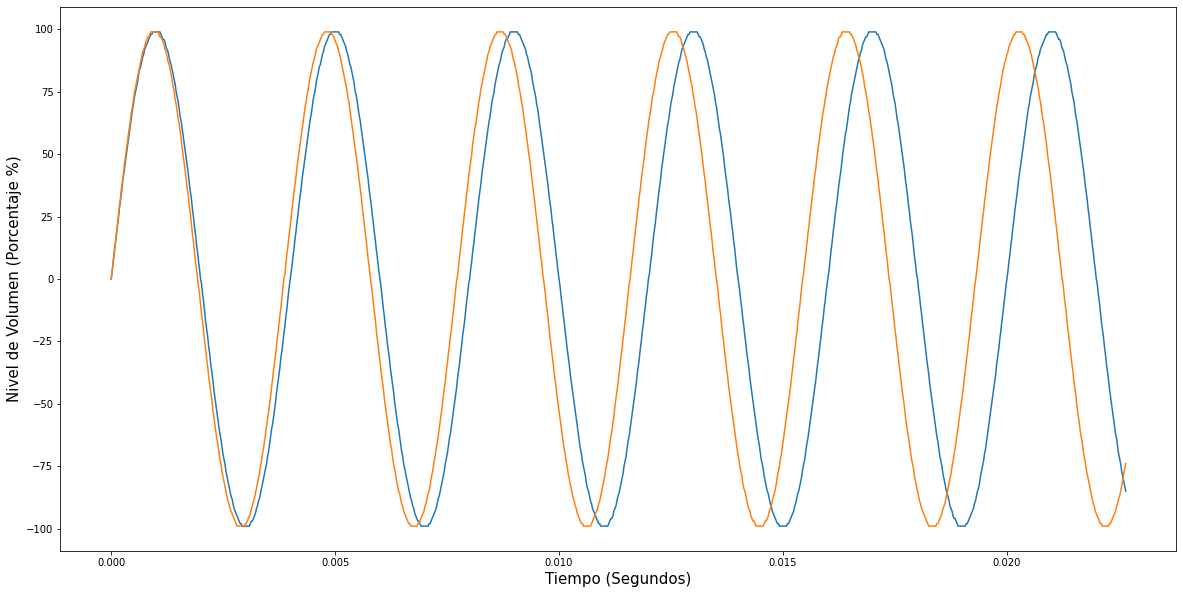

In [188]:
normalized_tone = np.int16((data / data.max()) * 100)

plt.plot(xvector[:1000],normalized_tone[:1000])
plt.ylabel('Nivel de Volumen (Porcentaje %)', fontsize=15)
plt.xlabel('Tiempo (Segundos)', fontsize=15)
plt.show()


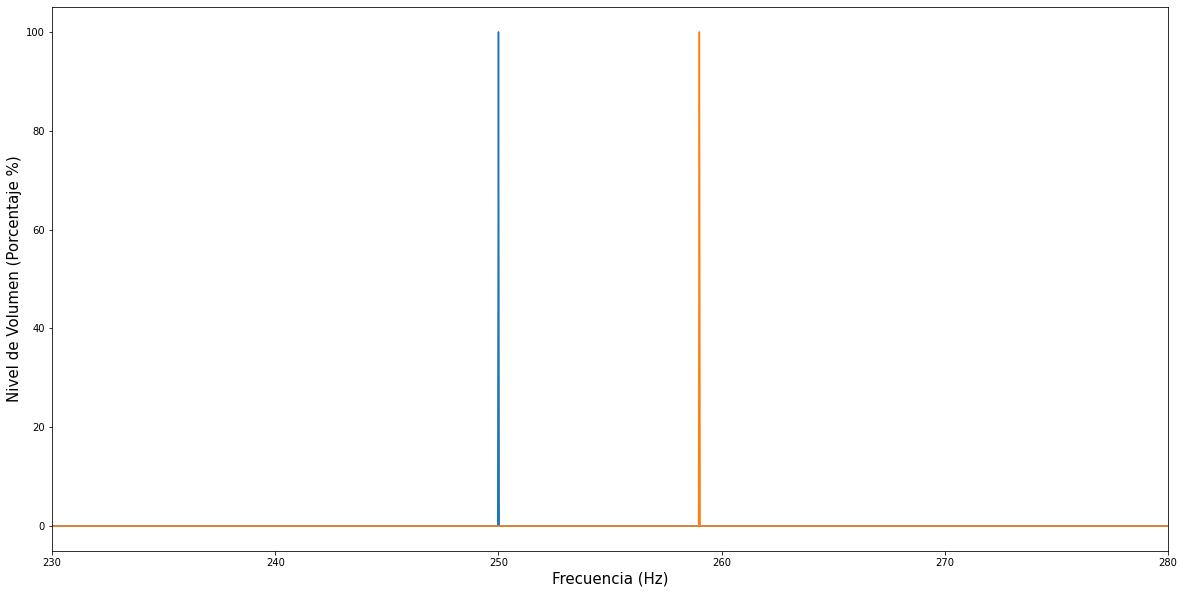

In [189]:
from scipy.fft import rfft, rfftfreq

N = samplerate * length

yf = rfft(normalized_tone[:,0])
xf = rfftfreq(int(N), 1 / samplerate)

N = samplerate * length
yf1 = rfft(normalized_tone[:,1])
xf1 = rfftfreq(int(N), 1 / samplerate)

plt.plot(xf, (np.abs(yf)/np.abs(yf).max())*100)
plt.plot(xf1, (np.abs(yf1)/np.abs(yf1).max())*100)
plt.xlim([230,280])
plt.ylabel('Nivel de Volumen (Porcentaje %)', fontsize=15)
plt.xlabel('Frecuencia (Hz)', fontsize=15)
# plt.
plt.show()

### Pista con carrier

In [190]:
from scipy.io import wavfile
import scipy.io

samplerate, data = wavfile.read('beat_plus_carrier.wav')
print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")
print(f"Sample Rate = {samplerate} Hz")

number of channels = 2
length = 10.0s
Sample Rate = 48000 Hz


In [191]:
xvector=np.linspace(0,length,len(data))

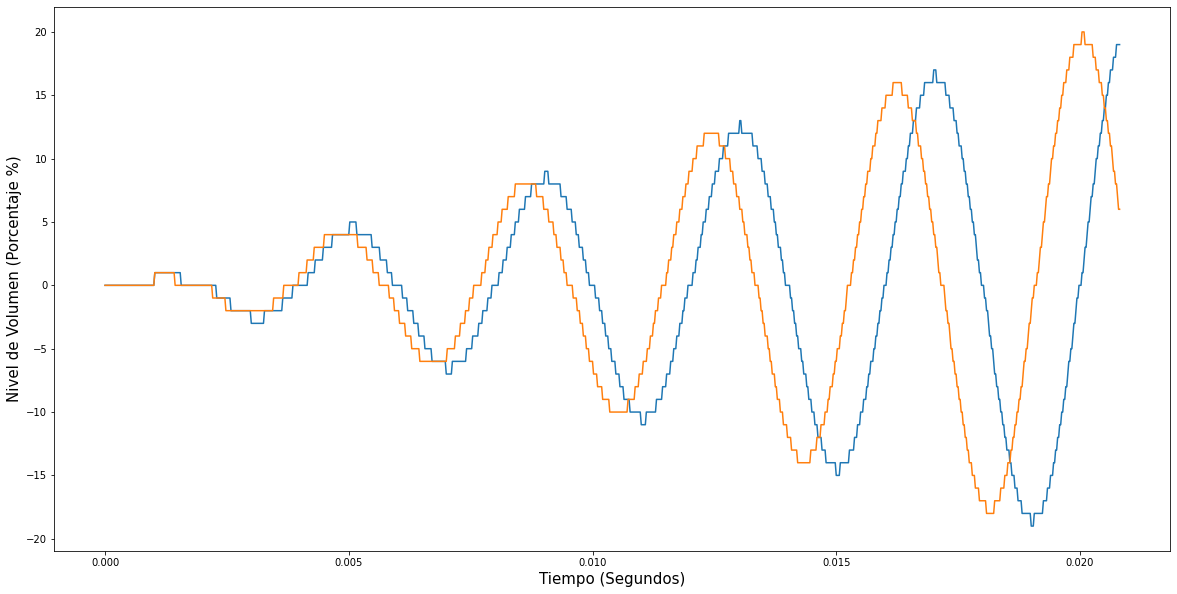

In [192]:
normalized_tone = np.int16((data / data.max()) * 100)

fig=plt.plot(xvector[:1000],normalized_tone[:1000])

plt.ylabel('Nivel de Volumen (Porcentaje %)', fontsize=15)
plt.xlabel('Tiempo (Segundos)', fontsize=15)
plt.show()


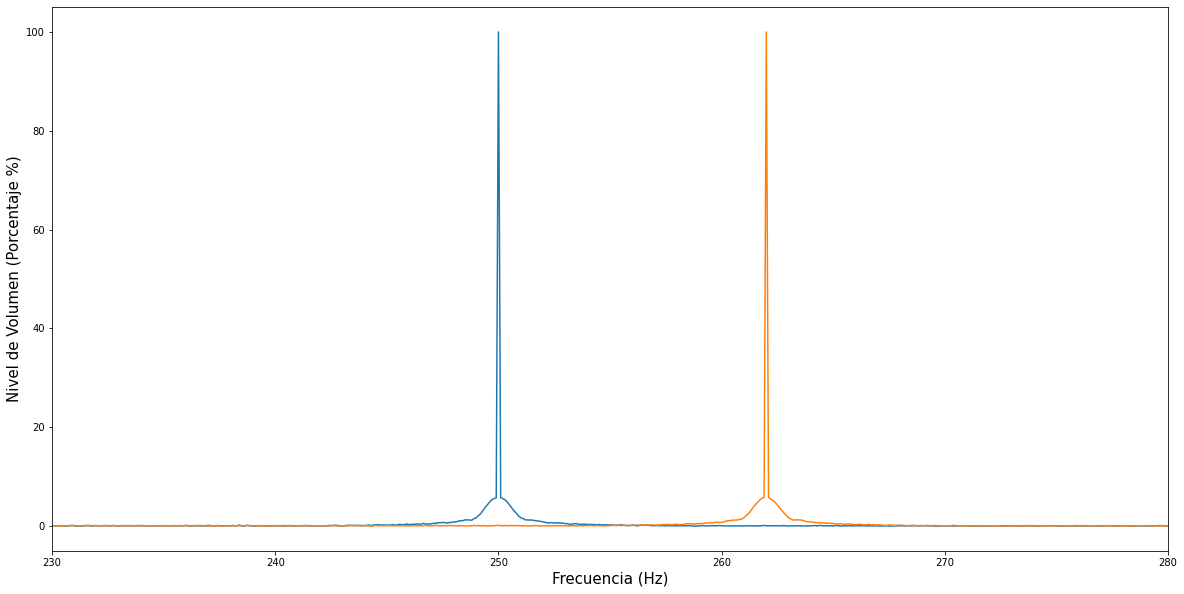

In [193]:
from scipy.fft import rfft, rfftfreq

N = samplerate * length

yf = rfft(normalized_tone[:,0])
xf = rfftfreq(int(N), 1 / samplerate)

N = samplerate * length
yf1 = rfft(normalized_tone[:,1])
xf1 = rfftfreq(int(N), 1 / samplerate)

plt.plot(xf, (np.abs(yf)/np.abs(yf).max())*100)
plt.plot(xf1, (np.abs(yf1)/np.abs(yf1).max())*100)
plt.xlim([230,280])
plt.ylabel('Nivel de Volumen (Porcentaje %)', fontsize=15)
plt.xlabel('Frecuencia (Hz)', fontsize=15)
# plt.
plt.show()

## Función generadora final

In [170]:
def binaural_player(frequencies,i,volumen=1,time=30,in_=1000,out=2000):
    brain_beat.save_beat(output_file_name="beat.wav",
                         frequencys=(frequencies[i][0], frequencies[i][1]),play_time=time,volume=volumen)
    beat = AudioSegment.from_file("beat.wav")
    mixed = beat.overlay(pista).fade_in(in_).fade_out(out)-40
#     return mixed
    print('Frecuencias reproducidas: '+str(frequencies[i][0])+'-'+ str(frequencies[i][1]))
    play(mixed)

In [171]:
t = threading.Thread(target=binaural_player,args=(frequencies,1))
t.start()

Frecuencias reproducidas: 250-280


In [172]:
while(1):
    stage=np.random.randint(1,5)
    
    print('Etapa de sueño: '+str(stage))
    
    t = threading.Thread(target=binaural_player,args=(frequencies,stage))
    t.start()
    
    
    

Etapa de sueño: 3
Etapa de sueño: 2
Etapa de sueño: 3
Etapa de sueño: 2
Etapa de sueño: 3
Etapa de sueño: 4
Etapa de sueño: 4
Etapa de sueño: 1
Etapa de sueño: 3
Etapa de sueño: 1
Etapa de sueño: 1
Etapa de sueño: 3
Etapa de sueño: 1
Etapa de sueño: 2
Etapa de sueño: 2
Etapa de sueño: 2
Etapa de sueño: 1
Etapa de sueño: 3
Etapa de sueño: 4
Etapa de sueño: 2
Etapa de sueño: 3
Etapa de sueño: 2
Etapa de sueño: 3
Etapa de sueño: 3
Etapa de sueño: 2
Etapa de sueño: 4
Etapa de sueño: 3
Etapa de sueño: 2
Etapa de sueño: 3
Etapa de sueño: 1
Etapa de sueño: 1
Etapa de sueño: 3

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Frecuencias reproducidas: 250-259
Frecuencias reproducidas: 250-256
Frecuencias reproducidas: 250-256
Frecuencias reproducidas: 250-280
Frecuencias reproducidas: 250-256
Frecuencias reproducidas: 250-259
Frecuencias reproducidas: 250-252


KeyboardInterrupt: 

Frecuencias reproducidas: 250-280
Frecuencias reproducidas: 250-259


## Diseño de plan de sueño

In [201]:
W=[1]*5*2
N1=[2]*5*2
N2=[3]*30*2
N3=[4]*50*2
REM=[5]*15*2
plan=W+N1+N2+N3+REM

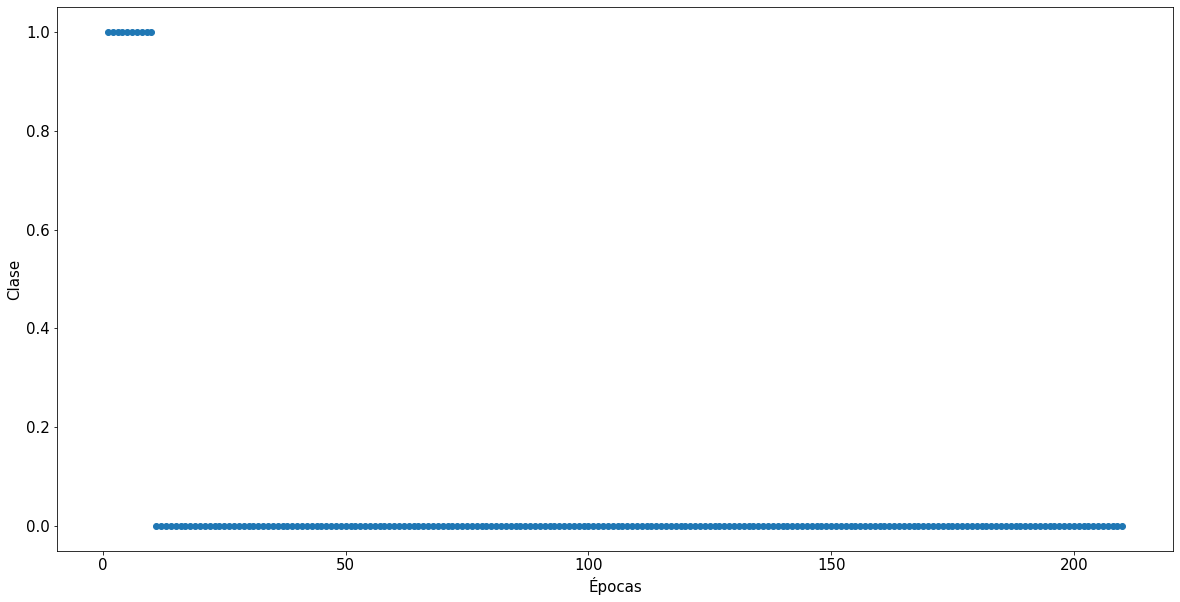

In [223]:
plt.scatter(np.linspace(1,len(plan),210),W+list(np.zeros(len(plan)-len(W))))


plt.xlabel('Épocas',fontsize=15)
plt.ylabel('Clase',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [215]:
len(W+list(np.zeros(len(plan)-len(W))))

210

In [216]:
len(plan)

210

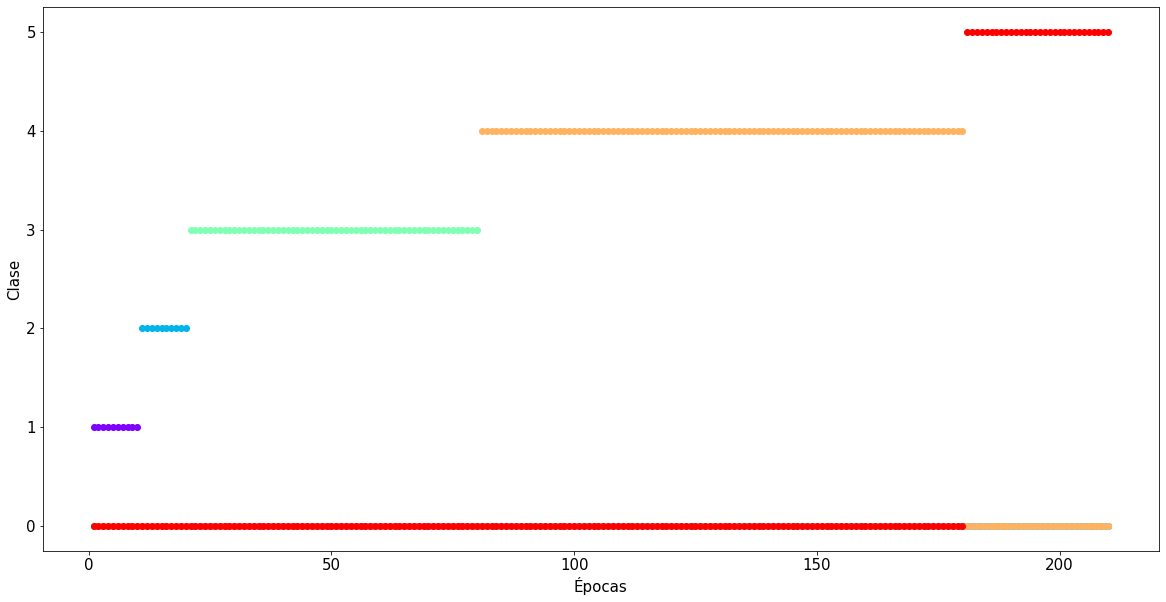

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

epochs=np.linspace(1,len(plan),len(plan))
W_part=W+list(np.zeros(len(plan)-len(W)))
N1_part=list(np.zeros(len(W)))+N1+list(np.zeros(len(plan)-len(W)-len(N1)))
N2_part=list(np.zeros(len(W)+len(N1)))+N2+list(np.zeros(len(plan)-len(W)-len(N1)-len(N2)))
N3_part=list(np.zeros(len(W)+len(N1)+len(N2)))+N3+list(np.zeros(len(plan)-len(W)-len(N1)-len(N2)-len(N3)))
REM_part=list(np.zeros(len(W)+len(N1)+len(N2)+len(N3)))+REM
colors = cm.rainbow(np.linspace(0, 1, 5))
plt.scatter(epochs,W_part,color=colors[0])
plt.scatter(epochs,N1_part,color=colors[1])
plt.scatter(epochs,N2_part,color=colors[2])
plt.scatter(epochs,N3_part,color=colors[3])
plt.scatter(epochs,REM_part,color=colors[4])

plt.xlabel('Épocas',fontsize=15)
plt.ylabel('Clase',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# plt.scatter(x,ys)

# colors
# for y, c in zip(ys, colors):
#     plt.scatter(x, y, color=c)

In [232]:
W_part=W+list(np.zeros(len(plan)-len(W)))
N1_part=list(np.zeros(len(W)))+N1+list(np.zeros(len(plan)-len(W)-len(N1)))
N2_part=list(np.zeros(len(W)+len(N1)))+N2+list(np.zeros(len(plan)-len(W)-len(N1)-len(N2)))
N3_part=list(np.zeros(len(W)+len(N1)+len(N2)))+N3+list(np.zeros(len(plan)-len(W)-len(N1)-len(N2)-len(N3)))
REM_part=list(np.zeros(len(W)+len(N1)+len(N2)+len(N3)))+REM

In [231]:
N3_part

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
